# EDA & Data Cleaning

## Client Profiles data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Client Profiles
file_path = 'DataFiles/df_final_demo.txt'
df = pd.read_csv(file_path, encoding='utf-8')
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


# Experiment Roster

In [907]:
file_path = 'DataFiles/df_final_experiment_clients.txt'
df_final_experiment_clients = pd.read_csv(file_path, encoding='utf-8')

num_empty_or_nan = df_final_experiment_clients['Variation'].isna().sum() + (df_final_experiment_clients['Variation'] == '').sum()
print(f"Number of NaN or empty values in the 'Variation' column: {num_empty_or_nan}")

df_final_experiment_clients = df_final_experiment_clients.dropna(subset=['Variation'])

df_final_experiment_clients.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print("DataFrame after dropping NaN values in 'Variation':")
df_final_experiment_clients

Number of NaN or empty values in the 'Variation' column: 20109
DataFrame after dropping NaN values in 'Variation':


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


# Merge Client Profiles and Experiment Roster data set

In [909]:
test_control_df = pd.merge(df, df_final_experiment_clients, on='client_id', how='inner')
test_control_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


# Digital Footprints

In [911]:
import pandas as pd
df1 = pd.read_csv('DataFiles/df_final_web_data_pt_1.txt')
df2 = pd.read_csv('DataFiles/df_final_web_data_pt_2.txt')
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


# Merge combined data with Digital Footprints

In [913]:
final_df = pd.merge(test_control_df, merged_df, on='client_id', how='inner')

columns_to_convert = [
    'clnt_tenure_yr',
    'clnt_tenure_mnth',
    'clnt_age',
    'num_accts',
    'calls_6_mnth',
    'logons_6_mnth'
]
def convert_to_int(df, columns):
    for column in columns:
        final_df[column] = final_df[column].replace([float('inf'), -float('inf')], pd.NA)
        final_df[column] = final_df[column].fillna(0) 
        final_df[column] = final_df[column].astype(int)

convert_to_int(final_df, columns_to_convert)
final_df['date_time'] = pd.to_datetime(final_df['date_time'])
final_df = final_df.rename(columns={'gendr': 'gender'})

# Define the start and end dates
start_date = '2017-03-15'
end_date = '2017-06-20'

# Filter the DataFrame for dates between start_date and end_date
filtered_df = final_df[(final_df['date_time'] >= start_date) & (final_df['date_time'] <= end_date)]
filtered_df.to_csv('DataFiles/final_data.csv', index=False)

In [915]:
import string
import numpy as np
import pandas as pd
import statistics as st
import pandas as pd
import csv

required_steps = ['start','step_1','step_2', 'step_3', 'confirm']

completed_steps_count = filtered_df.groupby('client_id')['process_step'].nunique()

clients_completed_all_steps = completed_steps_count[completed_steps_count == len(required_steps)].index.tolist()

df_completed_clients = filtered_df[filtered_df['client_id'].isin(clients_completed_all_steps)]

print("DataFrame of clients who have completed all process steps:")
df_completed_clients

DataFrame of clients who have completed all process steps:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6,73,60,U,2,45105.30,6,9,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321298,8739285,19,229,69,F,2,44994.24,1,4,Test,8756552_54841419737,101846948_96925910026_299041,confirm,2017-04-12 15:01:19
321299,8739285,19,229,69,F,2,44994.24,1,4,Test,8756552_54841419737,101846948_96925910026_299041,step_3,2017-04-12 14:58:39
321300,8739285,19,229,69,F,2,44994.24,1,4,Test,8756552_54841419737,101846948_96925910026_299041,step_2,2017-04-12 14:58:16
321301,8739285,19,229,69,F,2,44994.24,1,4,Test,8756552_54841419737,101846948_96925910026_299041,step_1,2017-04-12 14:50:44


# Client behavior analysis

In [886]:
required_steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Group by 'client_id' and 'visitor_id' and aggregate the steps each client completed
steps_completed_per_client = filtered_df.groupby(['client_id', 'visitor_id'])['process_step'].unique()

# Calculate how many clients completed all the required steps in order
clients_completed_all_steps = steps_completed_per_client.apply(lambda x: all(step in x for step in required_steps)).sum()

print(f"Clients who completed all steps: {clients_completed_all_steps}")

Clients who completed all steps: 33300


In [887]:
# Count unique clients at each process step
step_counts = filtered_df['process_step'].value_counts()
step_counts_df = step_counts.reset_index()
step_counts_df.columns = ['Process Step', 'Client Count']
print(step_counts_df)

  Process Step  Client Count
0        start        103470
1       step_1         68054
2       step_2         56572
3       step_3         48459
4      confirm         42966


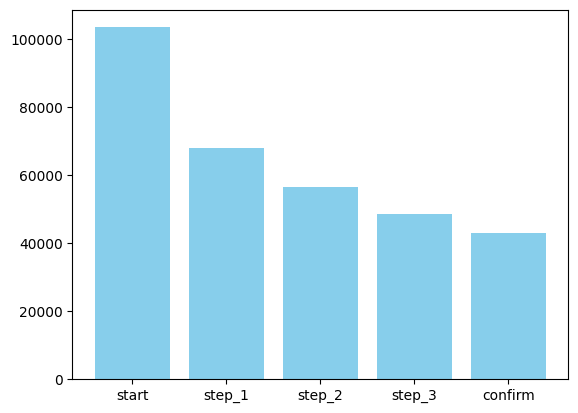

In [888]:
import matplotlib.pyplot as plt
plt.bar(step_counts_df['Process Step'], step_counts_df['Client Count'], color='skyblue')
plt.show()

# Who are the primary clients using this online process?

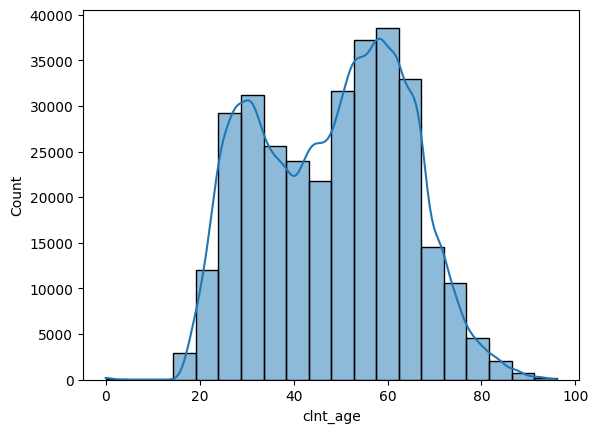

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Client Profiles dataset
df_final_demo = pd.read_csv('DataFiles/final_data.csv')

# 1. Age Distribution
sns.histplot(df_final_demo['clnt_age'], bins=20, kde=True)
plt.show()

/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_42470/514611711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_counts.index, y=age_counts.values, palette=palette)


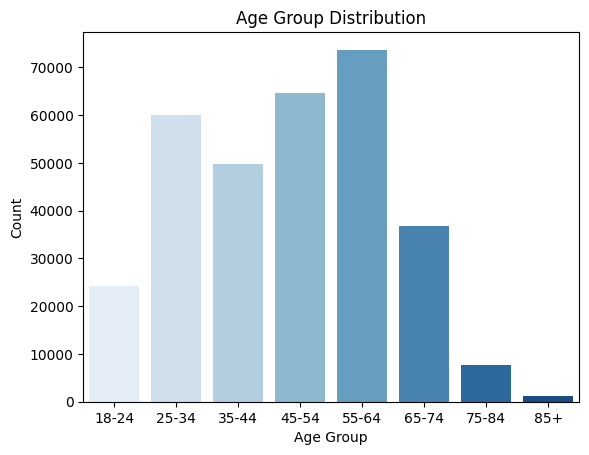

In [16]:
# Grouping ages into bins to identify the most common age group
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 95]
df_final_demo['age_group'] = pd.cut(df_final_demo['clnt_age'], bins=age_bins, labels=[
    '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])

age_counts = df_final_demo['age_group'].value_counts().sort_index()

# Plot the age group distribution
palette = sns.color_palette("Blues", len(age_counts))
sns.barplot(x=age_counts.index, y=age_counts.values, palette=palette)

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()


/var/folders/43/30gtvzf54299gghzdyc8_l900000gn/T/ipykernel_42470/1378520284.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final_demo, x='tenure_group', palette=palette)


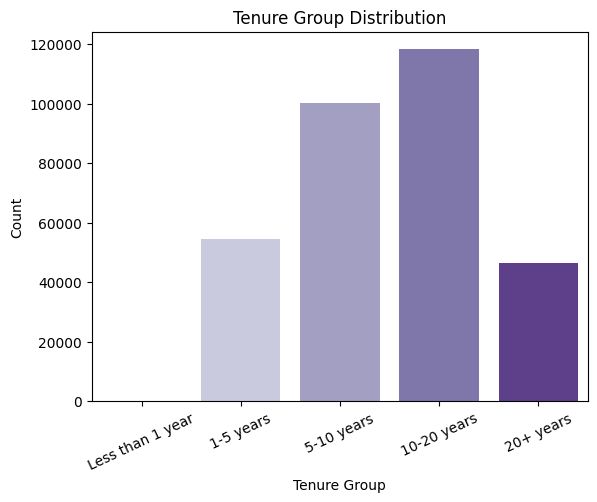

In [44]:
# 2. Client Tenure Analysis
df_final_demo['tenure_group'] = pd.cut(df_final_demo['clnt_tenure_yr'], bins=[0, 1, 5, 10, 20, 50], labels=[
    'Less than 1 year', '1-5 years', '5-10 years', '10-20 years', '20+ years'])

# Plot the tenure group distribution
palette = sns.color_palette("Purples", len(df_final_demo['tenure_group'].unique()))
sns.countplot(data=df_final_demo, x='tenure_group', palette=palette)

# Customize the plot
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.title('Tenure Group Distribution')
plt.xticks(rotation=25)
plt.show()



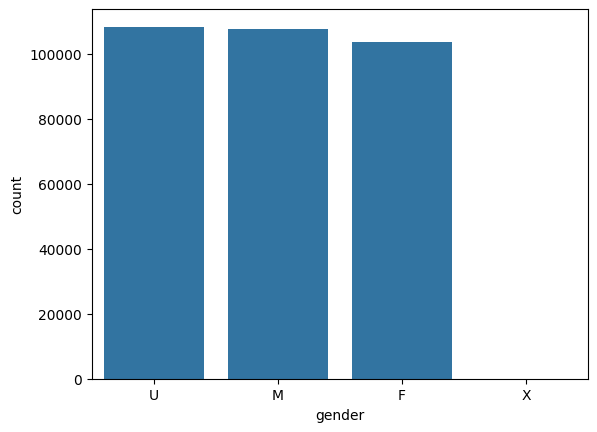

The primary clients are predominantly aged in the '55-64' group, with '10-20 years' tenure, and are mostly 'U'.


In [20]:
# 3. Gender Distribution
sns.countplot(data=df_final_demo, x='gender')
plt.show()

# Get the most common age group
most_common_age_group = df_final_demo['age_group'].mode()[0]

# Get the most common tenure group
most_common_tenure_group = df_final_demo['tenure_group'].mode()[0]

# Get the most common gender
most_common_gender = df_final_demo['gender'].mode()[0]

# Print the results
print(f"The primary clients are predominantly aged in the '{most_common_age_group}' group, "
      f"with '{most_common_tenure_group}' tenure, and are mostly '{most_common_gender}'.")

#most_common_age_group.to_csv('DataFiles/most_common_age_group.csv', index=False)

# Most Common Age Group: Clients predominantly fall into the '45-54' or '55-64' age group, based on what we saw in earlier insights.
# Most Common Tenure Group: Clients have a tenure of approximately '10-20 years', which shows that they are long-standing clients.
# Most Common Gender: The 'Unknown' category dominates in the gender column, followed by male and female clients.

# Are the primary clients younger or older, new or long-standing?

age_group
55-64    73669
45-54    64620
25-34    60033
35-44    49841
65-74    36719
18-24    24321
75-84     7649
85+       1096
Name: count, dtype: int64
tenure_group
10-20 years         118244
5-10 years          100102
1-5 years            54595
20+ years            46407
Less than 1 year         0
Name: count, dtype: int64


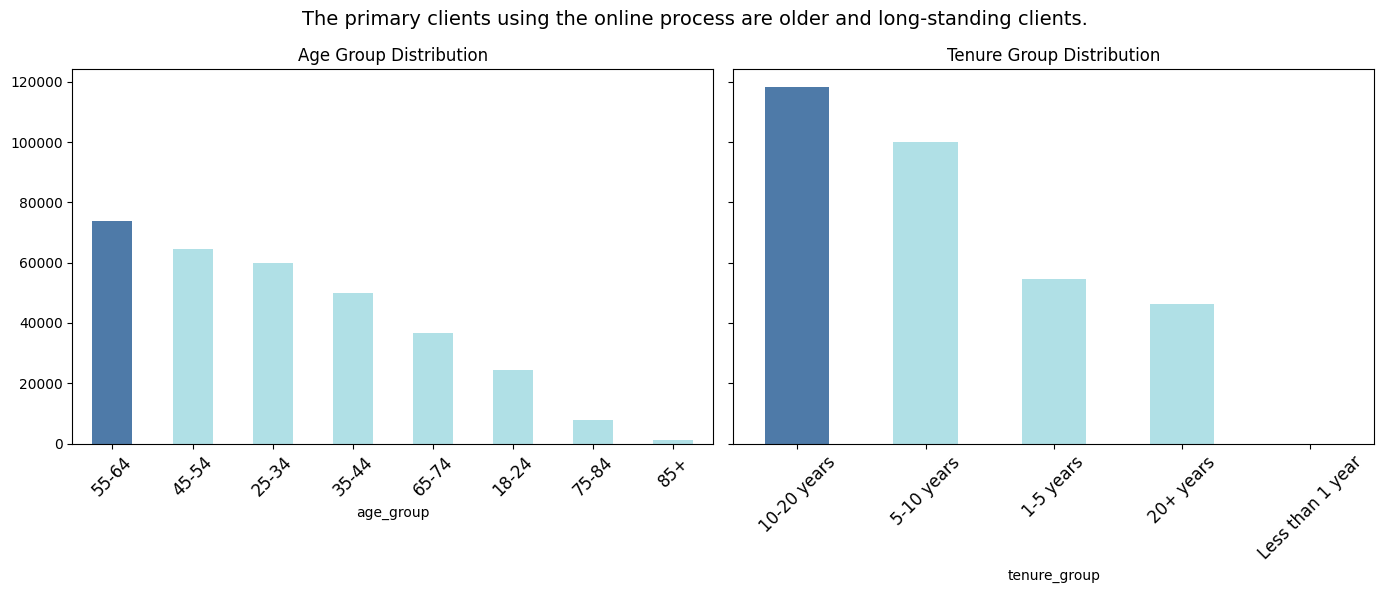

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

age_group_counts = df_final_demo['age_group'].value_counts()
tenure_group_counts = df_final_demo['tenure_group'].value_counts()

most_common_age_group = age_group_counts.idxmax()
most_common_tenure_group = tenure_group_counts.idxmax()

age_category = 'Younger' if most_common_age_group in ['18-24', '25-34', '35-44'] else 'Older'
tenure_category = 'New' if most_common_tenure_group in ['Less than 1 year', '1-5 years'] else 'Long-standing'

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
age_group_counts.plot(kind='bar', ax=axes[0], color=['#4e7AA8' if x == most_common_age_group else '#B0E0E6' for x in age_group_counts.index])
print(age_group_counts)

axes[0].set_xticks(range(len(age_group_counts)))
axes[0].set_xticklabels(age_group_counts.index, rotation=45, fontsize=12)
axes[0].set_title('Age Group Distribution')

tenure_group_counts.plot(kind='bar', ax=axes[1], color=['#4e7AA8' if x == most_common_tenure_group else '#B0E0E6' for x in tenure_group_counts.index])
print(tenure_group_counts)

age_counts = df_final_demo['age_group'].value_counts().reset_index()
age_counts.columns = ['age_group', 'age_count']

tenure_counts = df_final_demo['tenure_group'].value_counts().reset_index()
tenure_counts.columns = ['tenure_group', 'tenure_count']

# Merge the two DataFrames
combined_df = pd.merge(age_counts, tenure_counts, how='cross')

# Save to CSV
combined_df.to_csv('DataFiles/combined_age_tenure_counts.csv', index=False)

axes[1].set_xticks(range(len(tenure_group_counts)))
axes[1].set_xticklabels(tenure_group_counts.index, rotation=45, fontsize=12)
axes[1].set_title('Tenure Group Distribution')

fig.suptitle(f"The primary clients using the online process are {age_category.lower()} and {tenure_category.lower()} clients.", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
